In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("parulpandey/palmer-archipelago-antarctica-penguin-data")
folder_path = path
print(os.listdir(folder_path))

csv_path = os.path.join(folder_path, 'penguins_size.csv') # เลือก penguins_size.csv
penguins = pd.read_csv(csv_path)

penguins.head()

/Users/7n100489/Library/CloudStorage/OneDrive-BankofAyudhyaPublicCompanyLimited/Desktop/Workspace/github/intro-to-ml-and-dl/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['penguins_size.csv', 'penguins_lter.csv']


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
print(f"{penguins.isna().any()}")
# .isna() returns a DataFrame of the same shape as 'penguins',
# with True where the values are NaN (missing) and False otherwise.
# .any() applied on this DataFrame defaults to axis=0 (column-wise),
# so it returns a Series of booleans indicating whether each column
# contains at least one NaN value.
# The print will show which columns have any missing values.

print("-"*50)
# Prints a line of 50 dashes as a separator for better readability.

print(f"{penguins.isna().sum()}")
# .sum() here sums up the True values in each column (since True == 1),
# so it counts the total number of NaN values per column.
# The print will show how many missing values each column has.


species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool
--------------------------------------------------
species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


In [4]:
print(penguins.shape)
penguins[penguins.isna().any(axis=1)]

(344, 7)


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [5]:
penguins_clean = penguins.copy()
penguins_clean.dropna(inplace=True)
print(penguins_clean.shape)

(334, 7)


Load a Kaggle dataset with data about **penguin species**, eliminating by default the instances that contain missing values (for this, we use the *dropna()* function from *pandas* library).

In [6]:
# @title Target is to classifiy the species (3 classes) of penguins from feature artibutes
penguins_clean['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [7]:
penguins_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Data preparation, training and predictions. We will use **k=3**, so that each prediction will be based in the three closest training (labeled) instances to each test instance.

In [9]:
# Separate predictor variables from class label
# For predictor attributes, we only keep numerical and exclude categorical ones
X = penguins_clean.select_dtypes(exclude=['object'])
y = penguins_clean.species

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=4)

In [10]:
# @title k-Nearest Neighbors from scratch
import math
import numpy as np

# Euclidean distance
def euclidean(x, y):
  return np.sqrt(np.sum((x-y)**2))

# Locate the most similar neighbors
def get_neighbors(test_row, X_train, y_train, n_neighbors):
	distances = list()
	for (train_row, train_class) in zip(X_train, y_train):
		dist = euclidean(train_row, test_row)
		distances.append((dist, train_class))

  # Ex : [(0.75, 'A'), (1.41, 'A'), (2.23, 'B')]
	distances.sort(key=lambda tple: tple[0])
	neighbors = list()
	for i in range(n_neighbors):
		neighbors.append(distances[i][1])

  # Ex : ['A', 'A', 'B']
	return neighbors

# Get the modal (most common) value in the passed array
# arr = ['A', 'A', 'B']
# vals = ['A', 'B'], cnts = [2, 1]
def mode(arr):
  vals, cnts = np.unique(arr, return_counts=True)
  mode = vals[cnts.argmax()]

  return mode

# Make predictions
def predict(X_test, X_train, y_train, n_neighbors):
  preds = list()
  for test_row in X_test:
    neighbors = get_neighbors(test_row, X_train, y_train, n_neighbors)
    modal = mode(neighbors)
    preds.append(modal)

  return np.array(preds)

# Get accuracy
def accuracy(y_test, preds):
  return (preds == y_test).mean()

In [11]:
knn_predict_scratch = predict(X_test.values, X_train.values, y_train.values, n_neighbors=1)
accuracy(knn_predict_scratch, y_test)

np.float64(0.7920792079207921)

In [12]:
knn_predict_scratch = predict(X_test.values, X_train.values, y_train.values, n_neighbors=2)
accuracy(knn_predict_scratch, y_test)

np.float64(0.7524752475247525)

In [13]:
knn_predict_scratch = predict(X_test.values, X_train.values, y_train.values, n_neighbors=3)
accuracy(knn_predict_scratch, y_test)

np.float64(0.7722772277227723)

In [14]:
knn_predict_scratch = predict(X_test.values, X_train.values, y_train.values, n_neighbors=4)
accuracy(knn_predict_scratch, y_test)

np.float64(0.7722772277227723)

In [15]:
# @title From Scikit-Learn API
from sklearn.neighbors import KNeighborsClassifier

**DO IT YOURSELF**: Try other settings for "k" and observe how this affects the classifier performance.

In [16]:
# Initialize a kNN classifier, with hyperparameter 'k=3'
knn_n3 = KNeighborsClassifier(n_neighbors=3)

# Training the "model": this may lead to confusion, because KNN is an instance-based algorithm, not model based.
# However, scikit-learn still requires using this method, because the "model"
# will be defined by the training instances themselves.
knn_n3.fit(X_train, y_train)

# Making predictions on test data
predictions_n3 = knn_n3.predict(X_test)

accuracy_score(y_test, predictions_n3)

0.7722772277227723

In [17]:
# 1 cluster assigned

knn_n1 = KNeighborsClassifier(n_neighbors=1)
knn_n1.fit(X_train, y_train)
predictions_n1 = knn_n1.predict(X_test)

accuracy_score(y_test, predictions_n1)

0.7920792079207921

In [18]:
# 2 cluster assigned

knn_n2 = KNeighborsClassifier(n_neighbors=2)
knn_n2.fit(X_train, y_train)
predictions_n2 = knn_n2.predict(X_test)

accuracy_score(y_test, predictions_n2)

0.7524752475247525

In [19]:
# 4 cluster assigned

knn_n4 = KNeighborsClassifier(n_neighbors=4)
knn_n4.fit(X_train, y_train)
predictions_n4 = knn_n4.predict(X_test)

accuracy_score(y_test, predictions_n4)

0.7722772277227723

How can we find the best k value? We can calculate the accuracy of the prediction for multiple k values and see which is the best.

In [20]:
nK = 20
mean_acc = list()
for n in range(1, nK+1):
  knn_mul = KNeighborsClassifier(n_neighbors=n)
  knn_mul.fit(X_train, y_train)
  predictions_mul = knn_mul.predict(X_test)
  mean_acc.append(accuracy_score(y_test, predictions_mul))

mean_acc

[0.7920792079207921,
 0.7524752475247525,
 0.7722772277227723,
 0.7722772277227723,
 0.7227722772277227,
 0.7326732673267327,
 0.7227722772277227,
 0.7623762376237624,
 0.7326732673267327,
 0.7326732673267327,
 0.7623762376237624,
 0.7524752475247525,
 0.7623762376237624,
 0.7524752475247525,
 0.7623762376237624,
 0.7326732673267327,
 0.7128712871287128,
 0.7326732673267327,
 0.7425742574257426,
 0.7425742574257426]

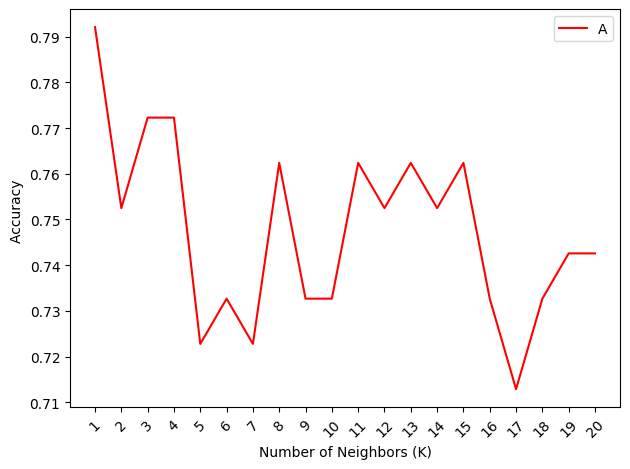

In [21]:
import matplotlib.pyplot as plt

plt.plot(range(1, nK+1), mean_acc, 'r')
plt.xticks(range(1, nK+1), fontsize=10, rotation=45)
plt.legend(('Accuracy '))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [22]:
# @title Visualization (Decision Boundaries for K-Nearest Neighbors)
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder

# For demonstrational purposes, we are going take two features
def plot_knn_two_feature_regions(X, y, n_neighbors=3, resolution=0.02):
  # setup marker generator and color map
  colors = ('orange', 'cornflowerblue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  X = X.loc[:, ['culmen_length_mm', 'culmen_depth_mm']]
  le = LabelEncoder()
  y = le.fit_transform(y) # plot does not accept string labels. We need to transform them into numbers
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=4)

  x1_min, x1_max = X_test.iloc[:, 0].min() - 1, X_test.iloc[:, 0].max() + 1
  x2_min, x2_max = X_test.iloc[:, 1].min() - 1, X_test.iloc[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
  print(f"Feature 1 {xx1.shape} | Feature 2 {xx2.shape}")

  '''
  xx1 = [[1, 2, 3],    → แถวที่ 1: ค่าของ feature 1
        [1, 2, 3],     → แถวที่ 2: เหมือนเดิม
        [1, 2, 3]]     → ทุกแถว = x-axis เดิมซ้ำ

  xx2 = [[10, 10, 10], → คอลัมน์ที่ 1: y = 10 ซ้ำ
        [20, 20, 20],
        [30, 30, 30]]  → y เพิ่มขึ้นในแต่ละแถว
  '''

  '''
  [(1, 10), (2, 10), (3, 10),
  (1, 20), (2, 20), (3, 20),
  (1, 30), (2, 30), (3, 30)]

  '''

  # kNN prediction
  knn = KNeighborsClassifier(n_neighbors)
  knn.fit(X_train, y_train)
  Z = knn.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

  # Put the result into a color plot
  Z = Z.reshape(xx1.shape)
  plt.figure()
  plt.pcolormesh(xx1, xx2, Z, cmap=cmap, shading='nearest')
  plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)

  # Plot the training points
  plt.scatter(X_test.iloc[:, 0],
            X_test.iloc[:, 1],
            c=y_test,
            cmap=cmap,
            edgecolor='k',
            s=20)

  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  plt.show()

  # Predict test set
  y_pred = knn.predict(X_test)

  # ⬅️ คำนวณ accuracy แล้วแสดงผล
  acc = accuracy_score(y_test, y_pred)
  print(f"Accuracy (K = {n_neighbors}) : {acc:.2f}")

Feature 1 (520, 1235) | Feature 2 (520, 1235)


/Users/7n100489/Library/CloudStorage/OneDrive-BankofAyudhyaPublicCompanyLimited/Desktop/Workspace/github/intro-to-ml-and-dl/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


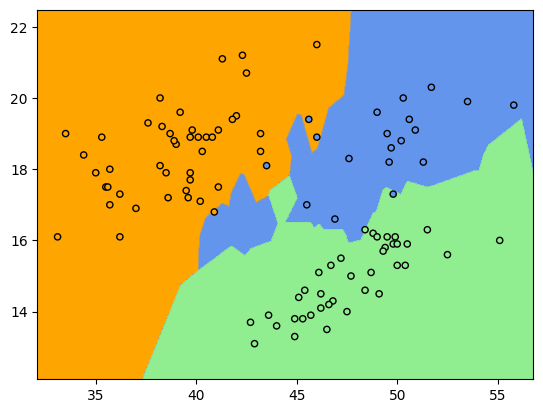

Accuracy (K = 1) : 0.94


In [23]:
plot_knn_two_feature_regions(X, y, n_neighbors=1)

Feature 1 (520, 1235) | Feature 2 (520, 1235)


/Users/7n100489/Library/CloudStorage/OneDrive-BankofAyudhyaPublicCompanyLimited/Desktop/Workspace/github/intro-to-ml-and-dl/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


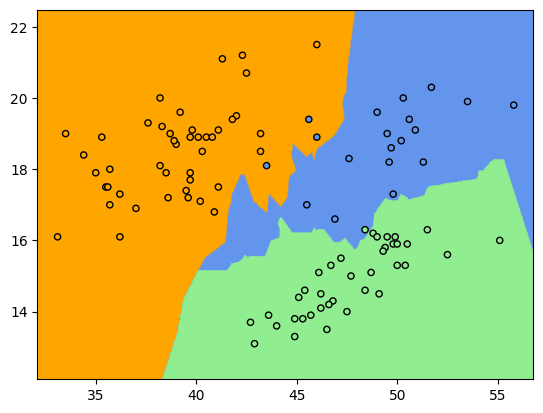

Accuracy (K = 2) : 0.96


In [24]:
plot_knn_two_feature_regions(X, y, n_neighbors=2)

Feature 1 (520, 1235) | Feature 2 (520, 1235)


/Users/7n100489/Library/CloudStorage/OneDrive-BankofAyudhyaPublicCompanyLimited/Desktop/Workspace/github/intro-to-ml-and-dl/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


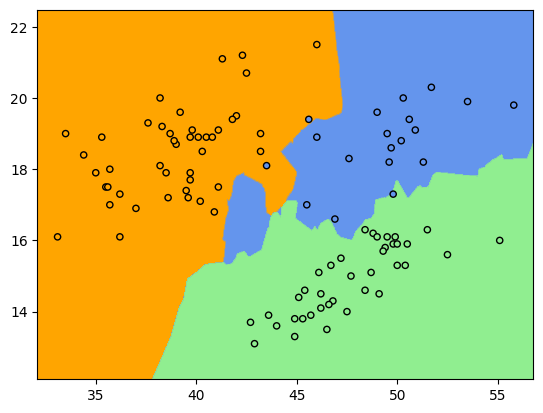

Accuracy (K = 3) : 0.97


In [25]:
plot_knn_two_feature_regions(X, y, n_neighbors=3)

Feature 1 (520, 1235) | Feature 2 (520, 1235)


/Users/7n100489/Library/CloudStorage/OneDrive-BankofAyudhyaPublicCompanyLimited/Desktop/Workspace/github/intro-to-ml-and-dl/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


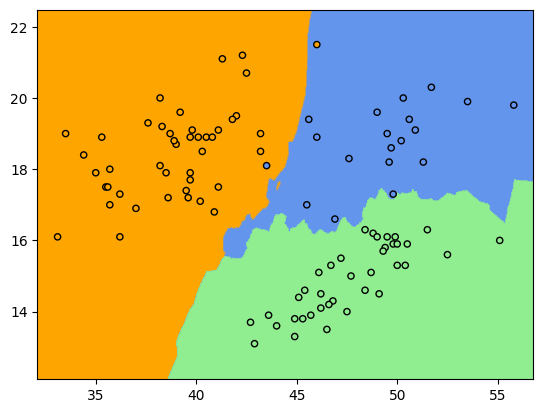

Accuracy (K = 10) : 0.98


In [26]:
plot_knn_two_feature_regions(X, y, n_neighbors=10)

---------
# Homework

ทำการใช้ kNN algorithm มา predict ข้อมูลใน Apple Quality Dataset ใน column ส่วนข้อมูล Quality (binary classification) แล้วหาผลลัพธ์ ดังนี้
  
1. ให้สร้าง train set และ test set จาก dataset ที่กำหนด โดยให้ test_size=0.3 และ random_state=42
2. ใช้ kNN algorithm โดยกำหนดค่า k ทั้งหมด 30 ค่า (1-30) และทำการ log accuracy ของแต่ละ k แสดงในรูปแบบของ line chart พร้อมทั้งระบุว่าค่า k ค่าใดที่ทำให้ model มี accuracy ที่สูงที่สุด (เลือก feature ทั้งหมด ยกเว้น A_id)

3. ทำการสร้าง Decision Boundaries โดยใช้ค่า k จากเลขท้ายของเลขประจำตัวนักศึกษา Ex 65010005 (k = 5),  65010030 (k = 10) โดยมีเงื่อนไขคือ
  - เลือก feature 2 feature ที่จะทำให้ค่า accuracy สูงที่สุด โดยเลือกจาก ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity']
  - ทำการแสดง Decision Boundaries และ accuracy ที่ได้
** guide C(n,r)

In [27]:
import kagglehub
import os

# Download latest version
folder_path = kagglehub.dataset_download("nelgiriyewithana/apple-quality")
print(os.listdir(folder_path)) # เลือก "['apple_quality.csv']"

csv_path = os.path.join(folder_path, 'apple_quality.csv')
apple = pd.read_csv(csv_path)

apple

['apple_quality.csv']


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [28]:
apple_clean = apple.copy()
apple_clean.dropna(inplace=True)
apple_clean.shape

(4000, 9)

In [29]:
apple_clean['target'] = (apple_clean["Quality"] == "good").astype(int)

apple_clean

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality,target
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good,1
...,...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad,0
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good,1
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad,0
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good,1


In [30]:
apple_clean["Acidity"].isna().sum()
apple_clean["Acidity"] = pd.to_numeric(apple_clean["Acidity"], errors="coerce")
apple_clean


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality,target
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good,1
...,...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad,0
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good,1
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad,0
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good,1


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = apple_clean.drop(["A_id", "Quality", "target"], axis=1)
y = apple_clean["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [32]:
# @title k-Nearest Neighbors from scratch
import math
import numpy as np


# Euclidean distance
def euclidean(x, y):
    return np.sqrt(np.sum((x - y) ** 2))


# Locate the most similar neighbors
def get_neighbors(test_row, X_train, y_train, n_neighbors):
    distances = list()
    for train_row, train_class in zip(X_train, y_train):
        dist = euclidean(train_row, test_row)
        distances.append((dist, train_class))

        # Ex : [(0.75, 'A'), (1.41, 'A'), (2.23, 'B')]
    distances.sort(key=lambda tple: tple[0])
    neighbors = list()
    for i in range(n_neighbors):
        neighbors.append(distances[i][1])

        # Ex : ['A', 'A', 'B']
    return neighbors


# Get the modal (most common) value in the passed array
# arr = ['A', 'A', 'B']
# vals = ['A', 'B'], cnts = [2, 1]
def mode(arr):
    vals, cnts = np.unique(arr, return_counts=True)
    mode = vals[cnts.argmax()]

    return mode


# Make predictions
def predict(X_test, X_train, y_train, n_neighbors):
    preds = list()
    for test_row in X_test:
        neighbors = get_neighbors(test_row, X_train, y_train, n_neighbors)
        modal = mode(neighbors)
        preds.append(modal)

    return np.array(preds)


# Get accuracy
def accuracy(y_test, preds):
    return (preds == y_test).mean()

In [33]:
import matplotlib.pyplot as plt
import numpy as np

accuracies = []

for k in range(1, 31):
    preds = predict(X_test.values, X_train.values, y_train.values, n_neighbors=k)
    acc = accuracy(preds, y_test.values)

    print(f"round: {k}, acc: {acc:.4f}")

    accuracies.append(acc)

best_k = np.argmax(accuracies) + 1
best_acc = accuracies[best_k - 1]

print(f"✅ Best k = {best_k} with accuracy = {best_acc:.4f}")

round: 1, acc: 0.8883
round: 2, acc: 0.8592
round: 3, acc: 0.8917
round: 4, acc: 0.8783
round: 5, acc: 0.8983
round: 6, acc: 0.8833
round: 7, acc: 0.9017
round: 8, acc: 0.8975
round: 9, acc: 0.9025
round: 10, acc: 0.8925
round: 11, acc: 0.9025
round: 12, acc: 0.8892
round: 13, acc: 0.8942
round: 14, acc: 0.8908
round: 15, acc: 0.9025
round: 16, acc: 0.8950
round: 17, acc: 0.9000
round: 18, acc: 0.8908
round: 19, acc: 0.9008
round: 20, acc: 0.8950
round: 21, acc: 0.8992
round: 22, acc: 0.8950
round: 23, acc: 0.8958
round: 24, acc: 0.8925
round: 25, acc: 0.8992
round: 26, acc: 0.8875
round: 27, acc: 0.8950
round: 28, acc: 0.8900
round: 29, acc: 0.8917
round: 30, acc: 0.8883
✅ Best k = 9 with accuracy = 0.9025


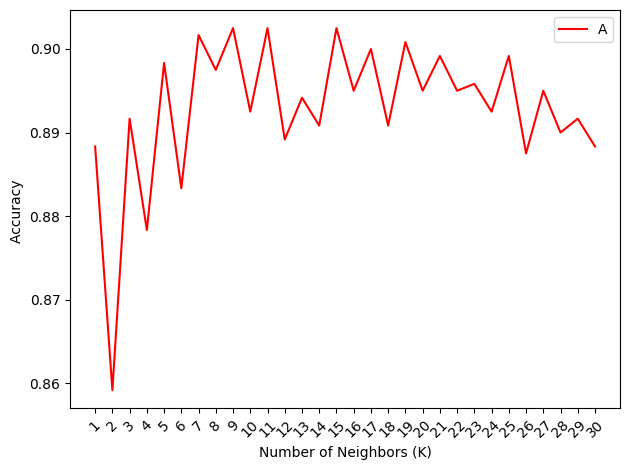

In [34]:
plt.plot(range(1, 31), accuracies, "r")
plt.xticks(range(1, 31), fontsize=10, rotation=45)
plt.legend(("Accuracy "))
plt.ylabel("Accuracy ")
plt.xlabel("Number of Neighbors (K)")
plt.tight_layout()
plt.show()

In [35]:
from itertools import combinations

features = [
    "Size",
    "Weight",
    "Sweetness",
    "Crunchiness",
    "Juiciness",
    "Ripeness",
    "Acidity",
]

best_acc = 0
best_pair = None
total_pairs = 0

for f1, f2 in combinations(features, 2):
    total_pairs += 1
    X = apple_clean[[f1, f2]]
    y = apple_clean["target"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    model = KNeighborsClassifier(n_neighbors=7)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)

    print(f"Pair {total_pairs}: ({f1}, {f2}) => Accuracy: {acc:.4f}")


    if acc > best_acc:
        best_acc = acc
        best_pair = (f1, f2)

print(f"\nTotal pairs tested: {total_pairs}")
print(f"Best pair: {best_pair} | Accuracy (k=7): {best_acc:.2f}")

Pair 1: (Size, Weight) => Accuracy: 0.5958
Pair 2: (Size, Sweetness) => Accuracy: 0.6517
Pair 3: (Size, Crunchiness) => Accuracy: 0.6025
Pair 4: (Size, Juiciness) => Accuracy: 0.6525
Pair 5: (Size, Ripeness) => Accuracy: 0.6442
Pair 6: (Size, Acidity) => Accuracy: 0.5942
Pair 7: (Weight, Sweetness) => Accuracy: 0.5842
Pair 8: (Weight, Crunchiness) => Accuracy: 0.5875
Pair 9: (Weight, Juiciness) => Accuracy: 0.6108
Pair 10: (Weight, Ripeness) => Accuracy: 0.5925
Pair 11: (Weight, Acidity) => Accuracy: 0.6158
Pair 12: (Sweetness, Crunchiness) => Accuracy: 0.5950
Pair 13: (Sweetness, Juiciness) => Accuracy: 0.6167
Pair 14: (Sweetness, Ripeness) => Accuracy: 0.6392
Pair 15: (Sweetness, Acidity) => Accuracy: 0.5508
Pair 16: (Crunchiness, Juiciness) => Accuracy: 0.6233
Pair 17: (Crunchiness, Ripeness) => Accuracy: 0.6100
Pair 18: (Crunchiness, Acidity) => Accuracy: 0.5458
Pair 19: (Juiciness, Ripeness) => Accuracy: 0.6658
Pair 20: (Juiciness, Acidity) => Accuracy: 0.5883
Pair 21: (Ripeness, 

/Users/7n100489/Library/CloudStorage/OneDrive-BankofAyudhyaPublicCompanyLimited/Desktop/Workspace/github/intro-to-ml-and-dl/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


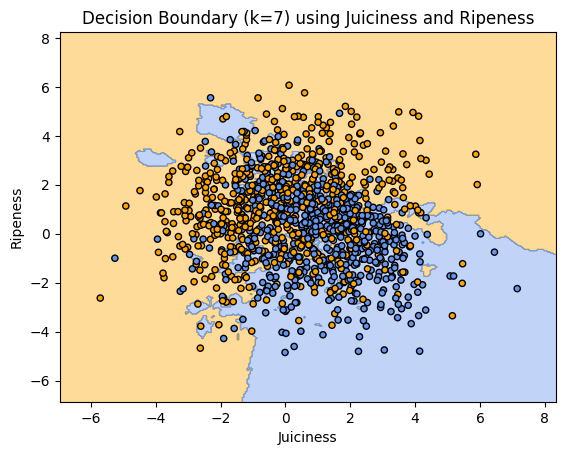

Accuracy (k=7): 0.67


In [36]:
def plot_decision_boundary(X, y, k, pair):
    X = X[list(pair)]
    le = LabelEncoder()
    y = le.fit_transform(y)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    # Create mesh grid
    resolution = 0.05
    x1_min, x1_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    x2_min, x2_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution)
    )

    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)

    # Plot
    plt.figure()
    colors = ("orange", "cornflowerblue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[: len(np.unique(y))])
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.scatter(
        X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, s=20, edgecolor="k", cmap=cmap
    )
    plt.title(f"Decision Boundary (k={k}) using {pair[0]} and {pair[1]}")
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.show()

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy (k={k}): {acc:.2f}")


X = apple_clean[[*best_pair]]
y = apple_clean["target"]
plot_decision_boundary(X, y, k=7, pair=best_pair);